## **Tiền xử lý và khám phá dữ liệu 1999-2022**

In [717]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple
from sklearn.preprocessing import LabelEncoder


In [718]:
raw_data_1999_2022 = pd.read_csv("./DATA/infant_mortality_data_1999_2022.csv")
raw_data_1999_2022.head()

,Cause of death,Age of mother,Mother's education,Birth weight,Age of infant at death,Deaths,Births,Death rate per 1000,Year
0,Certain infectious and parasitic diseases (A00...,15-19 years,9 - 11 years,500 - 999 grams,28 - 364 days,14.0,1927.0,7.39 (Unreliable),1999
1,Certain infectious and parasitic diseases (A00...,15-19 years,9 - 11 years,2500 - 2999 grams,28 - 364 days,11.0,55119.0,0.20 (Unreliable),1999
2,Certain infectious and parasitic diseases (A00...,15-19 years,9 - 11 years,3000 - 3499 grams,28 - 364 days,10.0,99462.0,0.10 (Unreliable),1999
3,Certain infectious and parasitic diseases (A00...,20-24 years,9 - 11 years,500 - 999 grams,28 - 364 days,15.0,1179.0,12.90 (Unreliable),1999
4,Certain infectious and parasitic diseases (A00...,20-24 years,12 years,500 - 999 grams,28 - 364 days,17.0,2490.0,6.93 (Unreliable),1999


In [719]:
raw_data_1999_2022.shape

(22710, 9)

- Dữ liệu có 22710 mẫu và có 9 cột thuộc tính

### **Ý nghĩa của từng cột trong dữ liệu ?**
- Cause of death: nguyên nhân chết của trẻ.
- Age of mother: khoảng tuổi của người mẹ.
- Mother's education: trình độ học vấn của người mẹ.
- Birth weight: cân nặng của bé khi sinh.
- Age of infant at death: tuổi của trẻ sơ sinh khi chết.
- Deaths: số ca tử vong.
- Births: số ca sinh.
- Death rate per 1000: tỉ lệ tử vong tính trên đơn vị phần nghìn. 
- Year: dữ liệu thu thập của năm.

### **Làm sạch dữ liệu**

Xử lý dữ liệu bị trùng lặp

In [720]:
num_duplicated_rows = raw_data_1999_2022.index.duplicated(keep='first').sum()

In [721]:
if num_duplicated_rows == 0: 
    print("Dữ liệu không có trùng lặp")
else : 
    print(f"Dữ liệu có  trùng lặp: {num_duplicated_rows} ")

Dữ liệu không có trùng lặp


**Xử lý mất giá trị**

In [722]:
def missing_ratio(series):
    return series.isnull().mean() * 100

In [723]:
miss_value_ratio = missing_ratio(raw_data_1999_2022)
miss_value_ratio

Cause of death            0.0
Age of mother             0.0
Mother's education        0.0
Birth weight              0.0
Age of infant at death    0.0
Deaths                    0.0
Births                    0.0
Death rate per 1000       0.0
Year                      0.0
dtype: float64

- Không có giá trị mất

In [724]:
dtypes = raw_data_1999_2022.dtypes
dtypes

Cause of death             object
Age of mother              object
Mother's education         object
Birth weight               object
Age of infant at death     object
Deaths                    float64
Births                    float64
Death rate per 1000        object
Year                        int64
dtype: object

### **Kiểu dữ liệu hiện tại của mỗi cột là gì? Có cột nào có kiểu dữ liệu không phù hợp không?**
- **Kiểu dữ liệu hiện tại của mỗi cột**
    + Cause of death: object
    + Age of mother: object
    + Mother's education : object
    + Birth weight: object
    + Age of infant at death: object
    + Deaths: float64
    + Births: float64
    + Death rate per 1000: object
    + Year: int64
- Các cột dữ liệu có kiểu dữ liệu không phù hợp: 
    + Kiểu dữ liệu Death rate per 1000 cần chỉnh về kiểu float.
    + Kiểu dữ liệu Year cần chỉnh về kiểu categorical.
    + Kiểu dữ liệu Birth weight cần chỉnh lại thành float bằng cách tính trung bình

#### **Thay đổi kiểu dữ liệu, giá trị phù hợp**

- Một số cột dữ liệu kiểu object như: Cause of death, Age of mother,.. cần chỉnh lại giá trị phù hợp như bỏ đi đơn vị year, grams.
    + Cần đồng bộ lại để cùng 1 đơn vị tính. Ví dụ như: 
        + Age of mother: dưới 15 cần chuyển lại cùng dạng với các giá trị khoản khác như 10-15 tuổi.
        + Mother's education thu thập không cùng 1 đơn vị đo.
        + Age of infant at death khác đơn vị thời gian như giờ, ngày,...
- Cause of death cần thể hiện một cách ngắn gọn

In [725]:
raw_data_1999_2022['Year'] = raw_data_1999_2022['Year'].astype('category')

raw_data_1999_2022['Births'] = raw_data_1999_2022['Births'].astype(int)
raw_data_1999_2022['Deaths'] = raw_data_1999_2022['Deaths'].astype(int)

# Loại bỏ phần "(Unreliable)" trong cột "Death rate per 1000"
raw_data_1999_2022["Death rate per 1000"] = raw_data_1999_2022["Death rate per 1000"].str.extract(r"(\d+\.\d+)").astype(float)

In [726]:
raw_data_1999_2022.dtypes

Cause of death              object
Age of mother               object
Mother's education          object
Birth weight                object
Age of infant at death      object
Deaths                       int64
Births                       int64
Death rate per 1000        float64
Year                      category
dtype: object

Đổi cột nguyên nhân tử vọng lại để ngắn gọn hơn

In [727]:
Cause_of_death_short = pd.read_csv("./DATA/Cause of death.csv")
Cause_of_death_short

,Cause of death,Short Name
0,Certain infectious and parasitic diseases (A00...,Certain infectious and parasitic diseases
1,#Septicemia (A40-A41),Septicemia
2,Diseases of the nervous system (G00-G98),Diseases of the nervous system
3,"Other diseases of nervous system (G04,G06-G11,...",Other diseases of nervous system
4,#Diseases of the circulatory system (I00-I99),Diseases of the circulatory system
...,...,...
56,Other external causes (Y10-Y36),Other external causes
57,"Viral diseases (A80-B34,U07.1)",Viral diseases
58,"Other and unspecified viral diseases (A81-B00,...",Other and unspecified viral diseases
59,Newborn affected by other maternal complicatio...,Newborn affected by other maternal complicatio...


In [728]:
# Tạo dictionary ánh xạ
cause_mapping = dict(zip(Cause_of_death_short['Cause of death'], Cause_of_death_short['Short Name']))

# Ánh xạ giá trị phần trăm vào cột "Cause of death"
raw_data_1999_2022['Cause of death'] = raw_data_1999_2022['Cause of death'].map(cause_mapping)
raw_data_1999_2022.to_csv("test.csv")

In [729]:
Age_of_mother = raw_data_1999_2022['Age of mother'].unique()
Age_of_mother

array(['15-19 years', '20-24 years', '25-29 years', '30-34 years',
       'Under 15 years', '35-39 years', '40-44 years'], dtype=object)

In [730]:
# Loại bỏ các đơn vị như "years"
raw_data_1999_2022["Age of mother"] = raw_data_1999_2022["Age of mother"].str.replace(" years", "", regex=False)

# đổi tuổi của mẹ từ dưới 15 tuổi thành từ 9-15
raw_data_1999_2022['Age of mother'] = raw_data_1999_2022['Age of mother'].replace("Under 15","9-15")
print(raw_data_1999_2022['Age of mother'].unique())

['15-19' '20-24' '25-29' '30-34' '9-15' '35-39' '40-44']


In [731]:
Birth_weight  = raw_data_1999_2022['Birth weight'].unique()
Birth_weight

array(['500 - 999 grams', '2500 - 2999 grams', '3000 - 3499 grams',
       '2000 - 2499 grams', '3500 - 3999 grams', '499 grams or less',
       '1000 - 1499 grams', '1500 - 1999 grams', 'Unknown or Not Stated',
       '4000 - 4499 grams'], dtype=object)

- Lỗi : "Unknown or Not Stated" , thực hiện xoá lỗi

In [732]:
raw_data_1999_2022 = raw_data_1999_2022[raw_data_1999_2022['Birth weight'] != 'Unknown or Not Stated']

# Loại bỏ các đơn vị như"grams"
raw_data_1999_2022["Birth weight"] = raw_data_1999_2022["Birth weight"].str.replace(" grams", "", regex=False)

# theo phân tích thì cân nặng khi sinh ít nhất là 200grams
raw_data_1999_2022['Birth weight'] = raw_data_1999_2022['Birth weight'].replace("499 or less","200 - 499")
print(raw_data_1999_2022['Birth weight'].unique())

['500 - 999' '2500 - 2999' '3000 - 3499' '2000 - 2499' '3500 - 3999'
 '200 - 499' '1000 - 1499' '1500 - 1999' '4000 - 4499']


In [733]:
Mother_education  = raw_data_1999_2022['Mother\'s education'].unique()
Mother_education

array(['9 - 11 years', '12 years', '13 - 15 years', '16 years and over',
       '0 -  8 years', 'Not stated/Not on certificate',
       'High school graduate or GED completed',
       '9th through 12th grade with no diploma',
       'Some college credit, but not a degree', '8th grade or less',
       'Associate degree (AA, AS)', "Bachelor's degree (BA, AB, BS)",
       "Master's degree (MA, MS, MEng, MEd, MSW, MBA)",
       'Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)'],
      dtype=object)

**Đưa về cùng 1 mức xếp trình độ học vấn của người mẹ**

In [734]:
for index, row in raw_data_1999_2022.iterrows():
    
    education = row["Mother's education"]
    
    # kiểm tra giá trị và đưa về cùng dạng
    if education == "0 -  8 years" or education == "8th grade or less":
        raw_data_1999_2022.loc[index, "Mother's education"] = "Elementary School or Less"
        
    if education == "9 - 11 years" or education == "9th through 12th grade with no diploma":
        raw_data_1999_2022.loc[index, "Mother's education"] = "High School Incomplete"
        
    if education == "12 years" or education == "High school graduate or GED completed":
        raw_data_1999_2022.loc[index, "Mother's education"] = "High School Graduate"
        
    if education == "13 - 15 years" or education == "Some college credit, but not a degree" or education == "Associate degree (AA, AS)" :
        raw_data_1999_2022.loc[index, "Mother's education"] = "Some College Education"
    
    if education == "16 years and over" or education == "Bachelor's degree (BA, AB, BS)" or education == "Master's degree (MA, MS, MEng, MEd, MSW, MBA)"or education == "Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)":
        raw_data_1999_2022.loc[index, "Mother's education"] = "College Graduate or Higher"
    if education == "Not stated/Not on certificate":
        raw_data_1999_2022.loc[index, "Mother's education"] = "Not Stated"

raw_data_1999_2022['Mother\'s education'].unique()

array(['High School Incomplete', 'High School Graduate',
       'Some College Education', 'College Graduate or Higher',
       'Elementary School or Less', 'Not Stated'], dtype=object)

In [735]:
Age_infant_at_death = raw_data_1999_2022['Age of infant at death'].unique()
Age_infant_at_death

array(['28 - 364 days', '1 - 23 hours', '1 - 6 days', 'Under 1 hour',
       '7 - 27 days'], dtype=object)

**Chuẩn hoá lại thời gian tử vong của trẻ cùng 1 đơn vị thời gian là giờ**

In [736]:
raw_data_1999_2022['Age of infant at death'] = raw_data_1999_2022['Age of infant at death'].replace(
                                            "28 - 364 days","672 - 8736").replace(
                                            "1 - 23 hours","1 - 23").replace(
                                            "Under 1 hour","0 - 1").replace(
                                            "1 - 6 days","24 - 144").replace(
                                            "7 - 27 days","189 - 648")

In [737]:
raw_data_1999_2022['Age of infant at death'].unique()

array(['672 - 8736', '1 - 23', '24 - 144', '0 - 1', '189 - 648'],
      dtype=object)

**Chuấn hoá lại giá trị các cột kiểu dữ liệu số cho phù hợp**

In [738]:
def checking_data(df: pd.DataFrame) -> bool:
    # Kiểm tra các điều kiện cho từng cột
    check_deaths = (df['Deaths'] >= 0).all()
    check_births = (df['Births'] >= 0).all()
    check_death_rate = (df['Death rate per 1000'] >= 0).all() and (df['Death rate per 1000'] <= 1000).all()
    
    # Kết hợp các điều kiện
    check = check_deaths and check_births and check_death_rate
    
    return check

In [739]:
checking_data(raw_data_1999_2022) == True

True

### **Với mỗi cột, các giá trị được phân bổ như thế nào?**

**Sự phân bố giá trị của các cột thuộc kiểu dữ liệu numerical**

In [740]:
raw_data_1999_2022.describe()

,Deaths,Births,Death rate per 1000
count,22666.000000,22666.000000,22666.00000
mean,26.172902,15317.679829,70.28286
std,25.468533,30461.781991,104.89139
min,10.000000,19.000000,0.06000
25%,12.000000,287.500000,1.31000
50%,17.000000,1022.000000,20.21000
75%,29.000000,12929.000000,94.01750
max,334.000000,176251.000000,790.77000


Sự phân bố giá trị của các cột không thuộc kiểu dữ liệu numerical

In [741]:
non_numerical_columns = raw_data_1999_2022.select_dtypes(exclude=["int", "float"]).columns
# print(non_numerical_columns)

results = {}


for col in non_numerical_columns:
    
    miss_value = round(missing_ratio(raw_data_1999_2022[col]),1)
    
    #loại bỏ giá trị thiếu
    col_data = raw_data_1999_2022[col].dropna()
   
    col_data = col_data.explode() if col_data.apply(lambda x: isinstance(x, list)).any() else col_data
    
    
    num_values = col_data.nunique()
    
     # Tính Tỉ lệ phần trăm của mỗi giá trị (không tính giá trị thiếu)
    value_counts = col_data.value_counts(normalize=True) * 100
    
    # print(value_counts)
    value_ratios = value_counts.round(1).to_dict()  # Chuyển thành dictionary
    
    # Lưu kết quả
    results[col] = {
        "missing_ratio": miss_value,
        "num_values": num_values,
        "value_ratios": value_ratios,
    }

# Chuyển kết quả thành DataFrame
cat_col_info_df = pd.DataFrame(results)
cat_col_info_df

,Cause of death,Age of mother,Mother's education,Birth weight,Age of infant at death,Year
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0
num_values,60,7,6,9,5,24
value_ratios,{'Certain conditions originating in the perina...,"{'20-24': 28.5, '25-29': 27.2, '30-34': 21.1, ...","{'High School Graduate': 36.2, 'Some College E...","{'200 - 499': 36.0, '500 - 999': 30.5, '3000 -...","{'1 - 23': 33.0, '672 - 8736': 28.7, '0 - 1': ...","{2000: 6.1, 2001: 5.9, 2002: 5.9, 1999: 5.9, 2..."


### **Tìm kiếm và xử lý các outliers trong dữ liệu**

In [742]:
## Các cột cần xoá outliers 

numerical_cols = ['Deaths', 'Births', 'Death rate per 1000']

**Trực quan bằng biểu đồ hộp (boxplot) để xác định outliers**

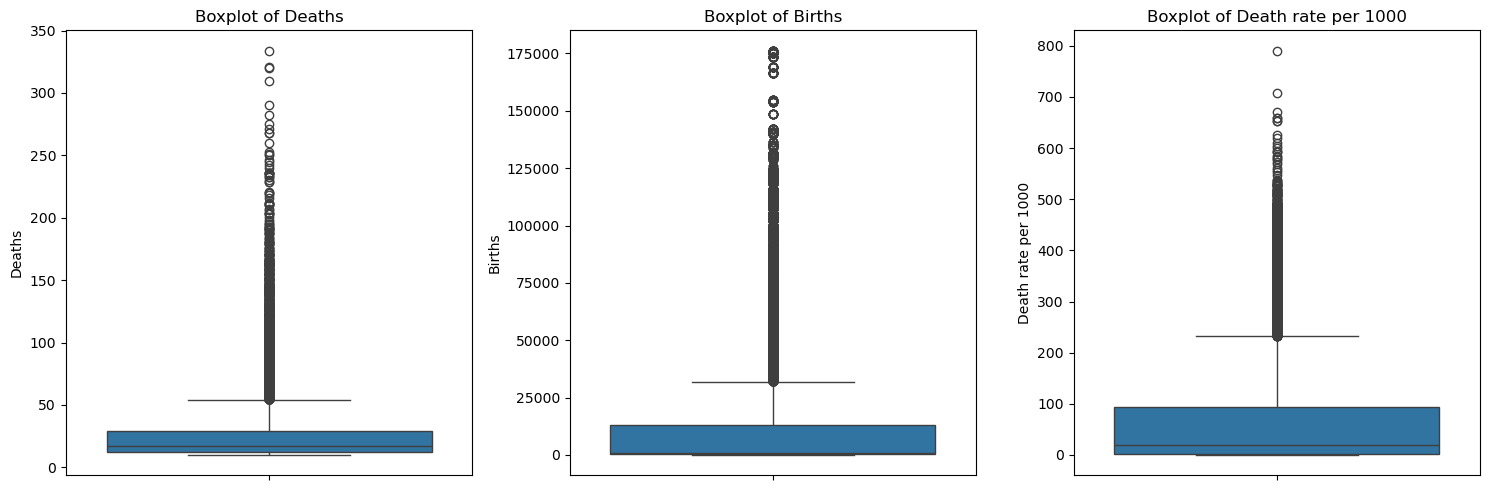

In [743]:
def detect_outlier(df: pd.DataFrame, numerical_cols: list):
    
    plt.figure(figsize=(5 * len(numerical_cols), 5))  
    for i, col in enumerate(numerical_cols):
        plt.subplot(1, len(numerical_cols), i + 1)  
        sns.boxplot(y=df[col]) 
        plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()
        
detect_outlier(raw_data_1999_2022,numerical_cols)

**Sử dụng phương pháp cắt (clip) giá trị ngoại lệ dựa trên các giới hạn của hộp số (boxplot boundaries) là một cách tiếp cận phổ biến để xử lý các ngoại lệ (outliers) trong dữ liệu.**

In [744]:
def find_boxplot_boundaries(col: pd.Series, whisker_coeff: float = 1.5) -> Tuple[float, float]:
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper

def clip_outliers(col: pd.Series, whisker_coeff: float = 1.5) -> pd.Series:
    lower, upper = find_boxplot_boundaries(col, whisker_coeff)
    return col.clip(lower, upper)

def remove_outliers_from_dataframe(df: pd.DataFrame, numerical_cols: list, whisker_coeff: float = 1.5) -> pd.DataFrame:
    df_clipped = df.copy()
    for col in numerical_cols:
        if col in df.columns:
            df_clipped[col] = clip_outliers(df_clipped[col], whisker_coeff)
    return df_clipped

clipped_data = remove_outliers_from_dataframe(raw_data_1999_2022, numerical_cols)

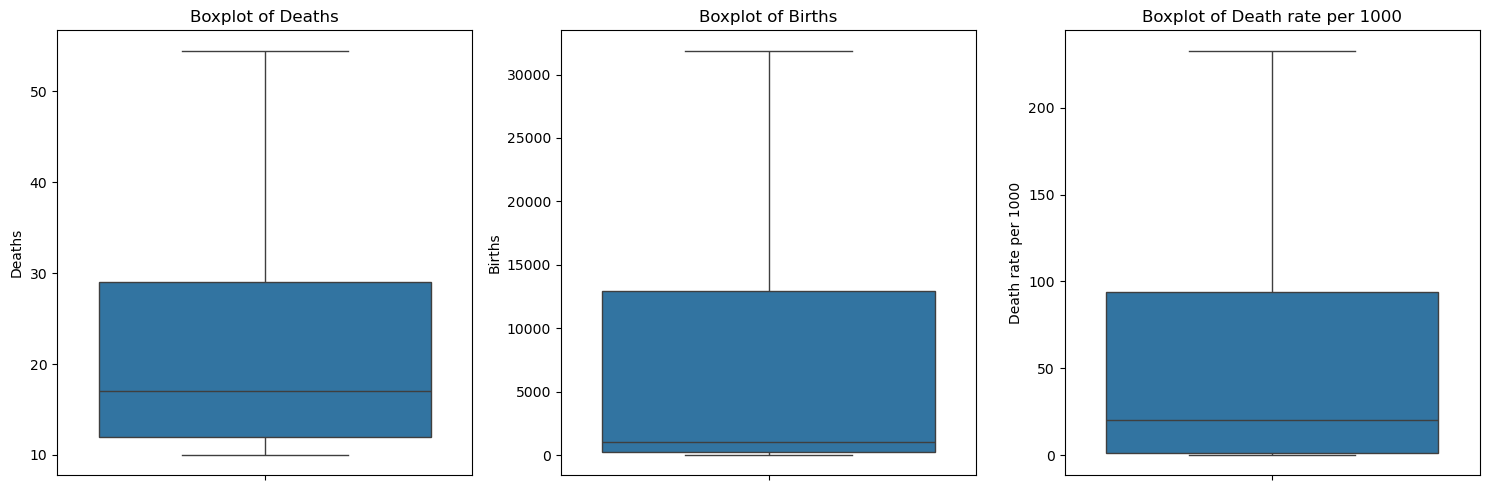

In [745]:
detect_outlier(clipped_data,numerical_cols)

- Phân tích việc chọn phương pháp để xủ lý outlier:
    + Sử dụng phương pháp cắt (clip) giá trị ngoại lệ dựa trên các giới hạn của hộp số (boxplot boundaries) là một cách tiếp cận phổ biến để xử lý các ngoại lệ (outliers) trong dữ liệu. Vì:
         - Giữ lại tính toàn vẹn của dữ liệu
         - Giảm thiểu tác động của các giá trị ngoại lệ lên phân tích thống kê.


**Xuất file đã tiền xử lý**

In [746]:
clipped_data.to_csv("./DATA/preprocessing_1999_2022.csv", index=False)


#### **Trực quang các thuộc tính trong dữ liệu**

In [747]:
# Hiển thị thông tin tổng quan về dữ liệu
print(clipped_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 22666 entries, 0 to 22709
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Cause of death          22666 non-null  object  
 1   Age of mother           22666 non-null  object  
 2   Mother's education      22666 non-null  object  
 3   Birth weight            22666 non-null  object  
 4   Age of infant at death  22666 non-null  object  
 5   Deaths                  22666 non-null  float64 
 6   Births                  22666 non-null  float64 
 7   Death rate per 1000     22666 non-null  float64 
 8   Year                    22666 non-null  category
dtypes: category(1), float64(3), object(5)
memory usage: 2.1+ MB
None


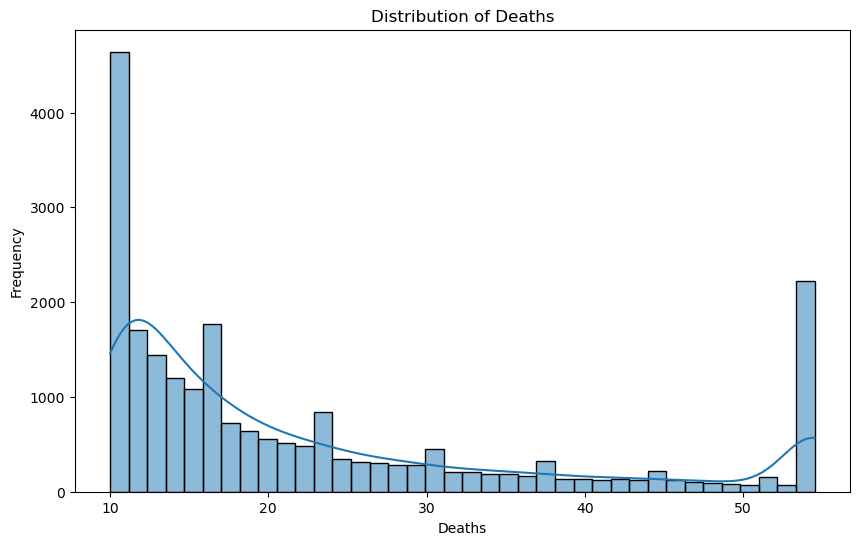

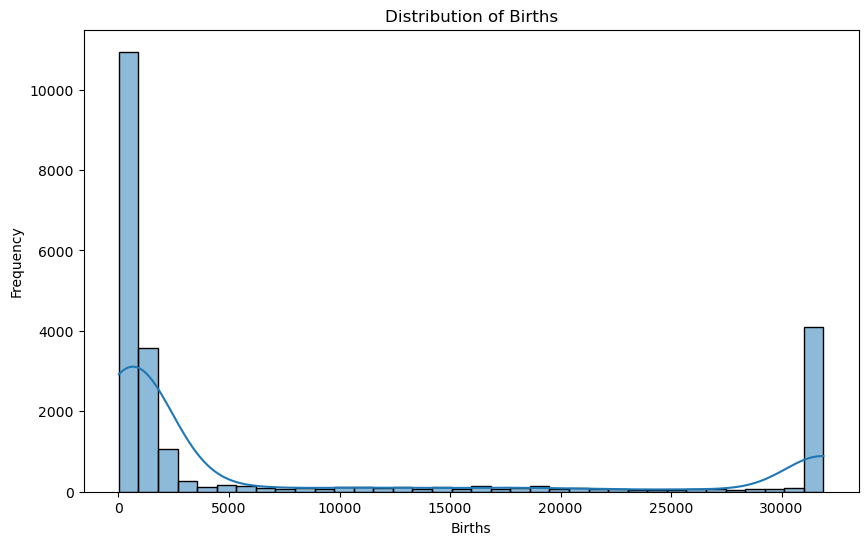

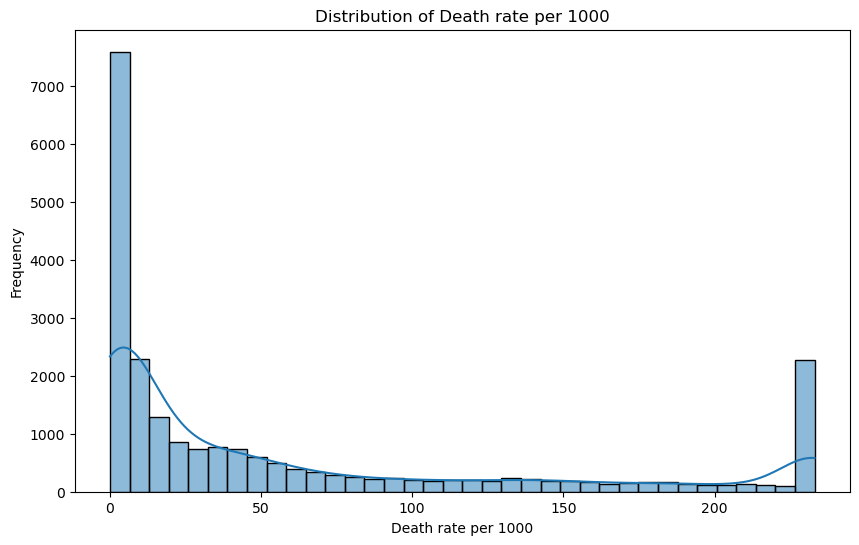

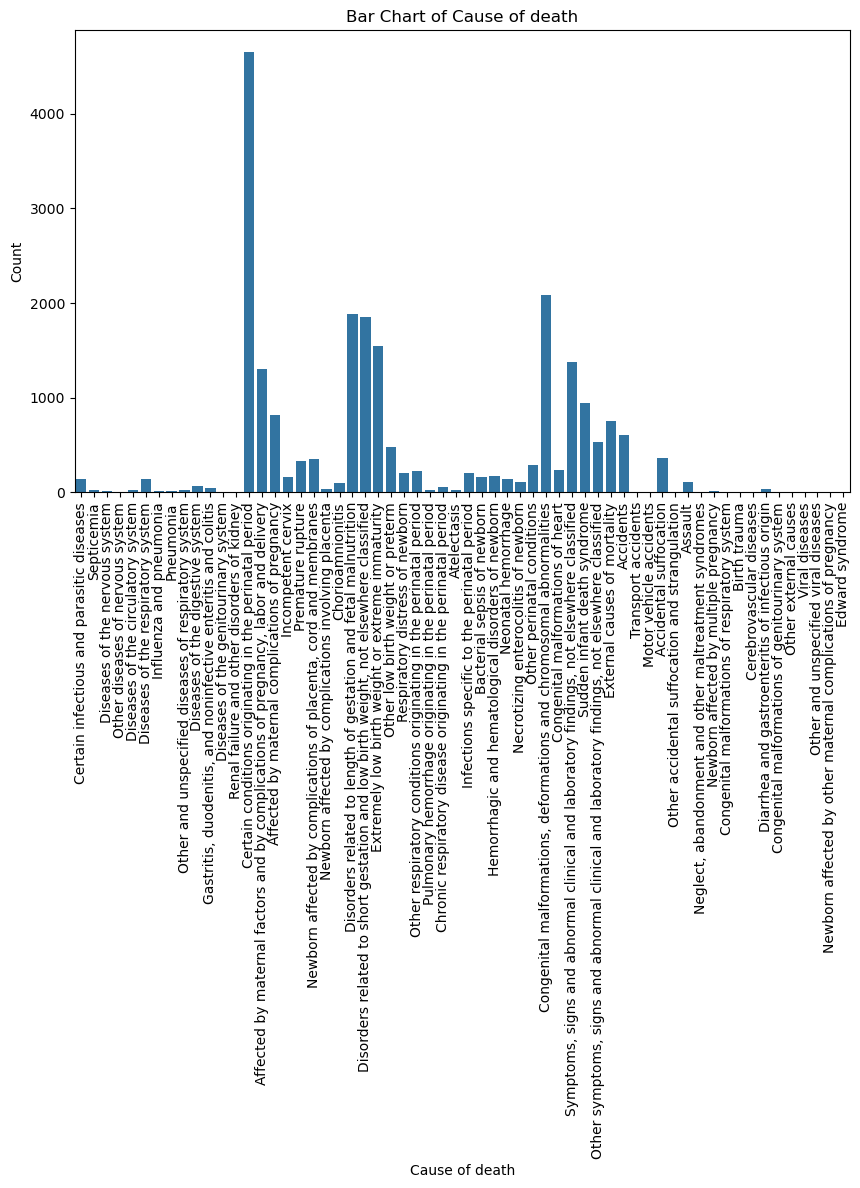

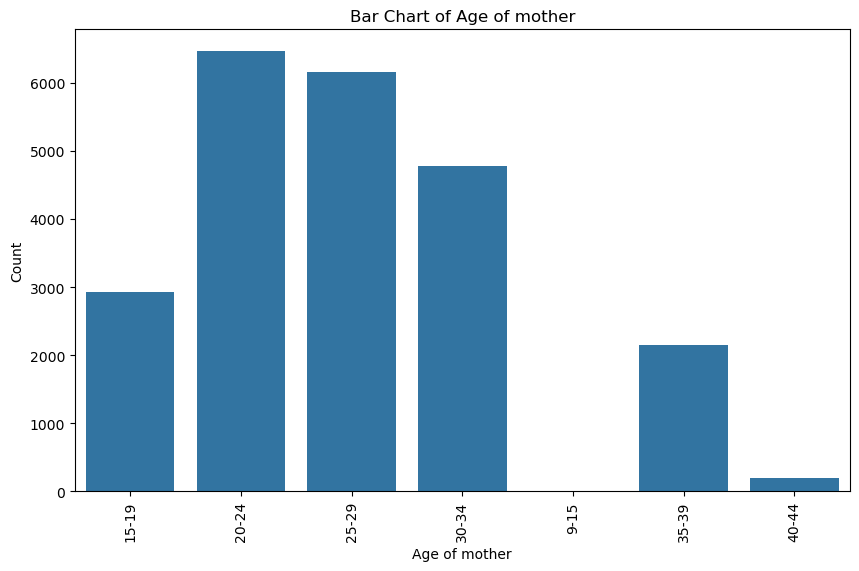

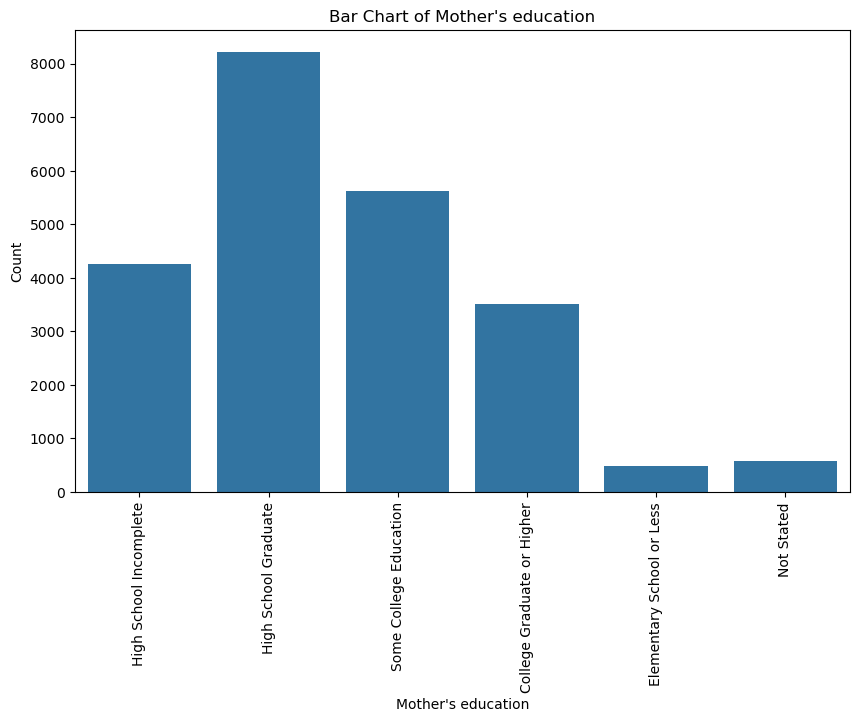

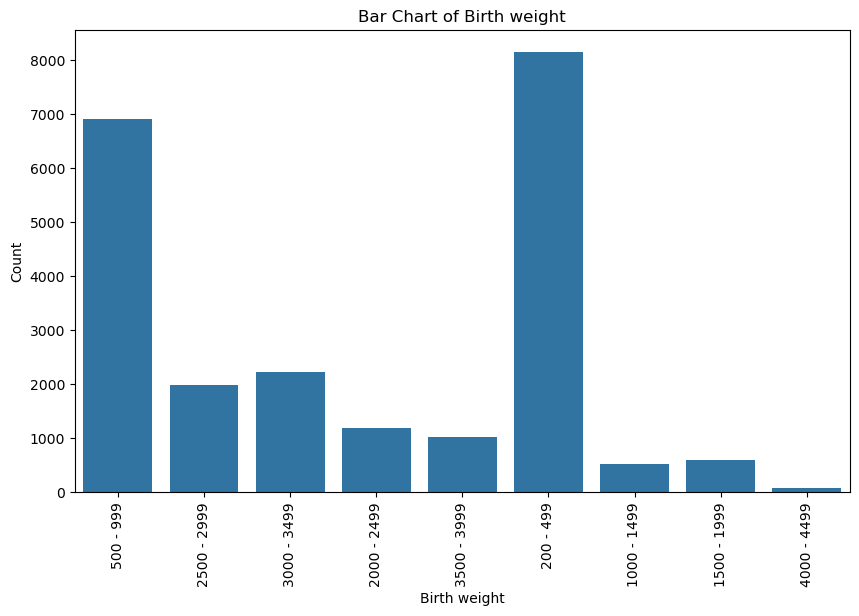

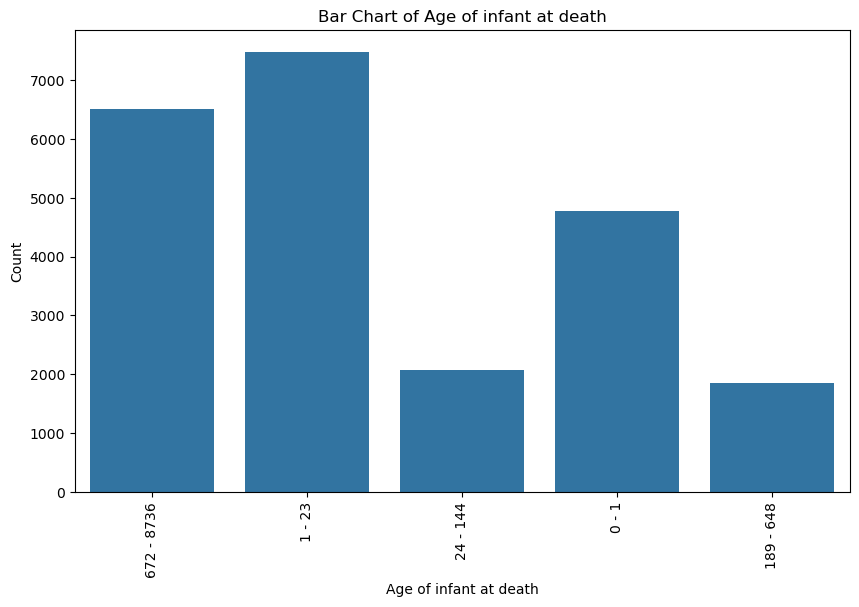

In [748]:
# Vẽ biểu đồ phân phối cho từng thuộc tính số
numeric_columns = clipped_data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(clipped_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()



# Vẽ biểu đồ cột cho từng thuộc tính phân loại
# Vẽ biểu đồ cho các thuộc tính còn lại
categorical_columns = clipped_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=clipped_data, x=column)
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

#### **Chuẩn hoá dữ liệu thành dạng numerical**

Chuẩn hoá thuộc tính cân nặng sau khi sinh bằng cách tính trung bình

In [749]:
data_1999_2022_encode = clipped_data

Chuẩn hoá thuộc tính nguyên nhân tử vong thành numerical

In [750]:
cause_of_death_col = data_1999_2022_encode['Cause of death']

cause_of_death_col_unique = cause_of_death_col.unique()

In [751]:
print(f"số lượng khả năng gây tử vong {len(cause_of_death_col_unique)}")
print(cause_of_death_col_unique)

số lượng khả năng gây tử vong 60
['Certain infectious and parasitic diseases' 'Septicemia'
 'Diseases of the nervous system' 'Other diseases of nervous system'
 'Diseases of the circulatory system' 'Diseases of the respiratory system'
 'Influenza and pneumonia' 'Pneumonia'
 'Other and unspecified diseases of respiratory system'
 'Diseases of the digestive system'
 'Gastritis, duodenitis, and noninfective enteritis and colitis'
 'Diseases of the genitourinary system'
 'Renal failure and other disorders of kidney'
 'Certain conditions originating in the perinatal period'
 'Affected by maternal factors and by complications of pregnancy, labor and delivery'
 'Affected by maternal complications of pregnancy' 'Incompetent cervix'
 'Premature rupture'
 'Newborn affected by complications of placenta, cord and membranes'
 'Newborn affected by complications involving placenta' 'Chorioamnionitis'
 'Disorders related to length of gestation and fetal malnutrition'
 'Disorders related to short gesta

In [752]:
cause_count = cause_of_death_col.value_counts()

cause_percentage = ((cause_count / cause_count.sum()) * 100).round(1)

# chuyển thành DataFrame để dễ dàng quan sát. 
cause_df = cause_percentage.reset_index()
cause_df.columns = ["Cause of death", "Percentage"]

# Sắp xếp theo tỷ lệ giảm dần (nếu cần)
cause_df = cause_df.sort_values(by="Percentage", ascending=False)

In [753]:
sum_of_percentage_greater_than_1 = 0
for i in range(cause_df.shape[0]):
    if cause_df['Percentage'][i] >= 1:
        sum_of_percentage_greater_than_1 += cause_df['Percentage'][i]
        print(f"{cause_df['Cause of death'][i]}: {cause_df['Percentage'][i]}%")


print(f"\ntổng tỷ lệ lớn hơn hoặc bằng 1%: {sum_of_percentage_greater_than_1}%")
print(f"tổng tỷ lệ nhỏ hơn 1%: {100 - sum_of_percentage_greater_than_1}%")

Certain conditions originating in the perinatal period: 20.5%
Congenital malformations, deformations and chromosomal abnormalities: 9.2%
Disorders related to length of gestation and fetal malnutrition: 8.3%
Disorders related to short gestation and low birth weight, not elsewhere classified: 8.2%
Extremely low birth weight or extreme immaturity: 6.8%
Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified: 6.0%
Affected by maternal factors and by complications of pregnancy, labor and delivery: 5.7%
Sudden infant death syndrome: 4.2%
Affected by maternal complications of pregnancy: 3.6%
External causes of mortality: 3.3%
Accidents: 2.7%
Other symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified: 2.3%
Other low birth weight or preterm: 2.1%
Accidental suffocation: 1.6%
Newborn affected by complications of placenta, cord and membranes: 1.5%
Premature rupture: 1.5%
Other perinatal conditions: 1.3%
Congenital malformations of

In [754]:
# Tạo dictionary ánh xạ
cause_mapping = dict(zip(cause_df['Cause of death'], cause_df['Percentage']))

# Ánh xạ giá trị phần trăm vào cột "Cause of death"
data_1999_2022_encode['Cause of death'] = data_1999_2022_encode['Cause of death'].map(cause_mapping)


In [755]:

for index, value in data_1999_2022_encode["Birth weight"].items():
    values = value.split(" - ")
    average = (int(values[0]) + int(values[1])) / 2
    data_1999_2022_encode.at[index, "Birth weight"] = average


In [756]:
data_1999_2022_encode["Birth weight"]

0         749.5
1        2749.5
2        3249.5
3         749.5
4         749.5
          ...  
22705    3249.5
22706    3749.5
22707    2749.5
22708    3249.5
22709    3249.5
Name: Birth weight, Length: 22666, dtype: object

Chuẩn hoá thuộc tính: tuổi của mẹ, trình độ học vấn, tuổi khi tử vọng của trẻ
Sử dụng phương pháp **label encoding** 

In [757]:
columns_to_encode  = ["Age of mother","Mother's education","Age of infant at death","Year"]


# dictionary to store encoding mappings
encoding_mappings = {}

# insert to new dataframe encoded columns
for col in data_1999_2022_encode.columns:
    if col in columns_to_encode:
        label_encoder = LabelEncoder()
        data_1999_2022_encode[col] = label_encoder.fit_transform(data_1999_2022_encode[col]) #encode values
        
        # store encoding values
        encoding_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
        
#Encoding Mappings
for col, mapping in encoding_mappings.items():
    print(f"{col}: {mapping}")    


Age of mother: {'15-19': 0, '20-24': 1, '25-29': 2, '30-34': 3, '35-39': 4, '40-44': 5, '9-15': 6}
Mother's education: {'College Graduate or Higher': 0, 'Elementary School or Less': 1, 'High School Graduate': 2, 'High School Incomplete': 3, 'Not Stated': 4, 'Some College Education': 5}
Age of infant at death: {'0 - 1': 0, '1 - 23': 1, '189 - 648': 2, '24 - 144': 3, '672 - 8736': 4}
Year: {1999: 0, 2000: 1, 2001: 2, 2002: 3, 2003: 4, 2004: 5, 2005: 6, 2006: 7, 2007: 8, 2008: 9, 2009: 10, 2010: 11, 2011: 12, 2012: 13, 2013: 14, 2014: 15, 2015: 16, 2016: 17, 2017: 18, 2018: 19, 2019: 20, 2020: 21, 2021: 22, 2022: 23}


**Kiểm tra lại kiểu dữ liệu**

In [759]:
data_1999_2022_encode.dtypes

Cause of death            float64
Age of mother               int64
Mother's education          int64
Birth weight               object
Age of infant at death      int64
Deaths                    float64
Births                    float64
Death rate per 1000       float64
Year                        int64
dtype: object

### **Mô tả sự tương quan giữa các thuộc tính**

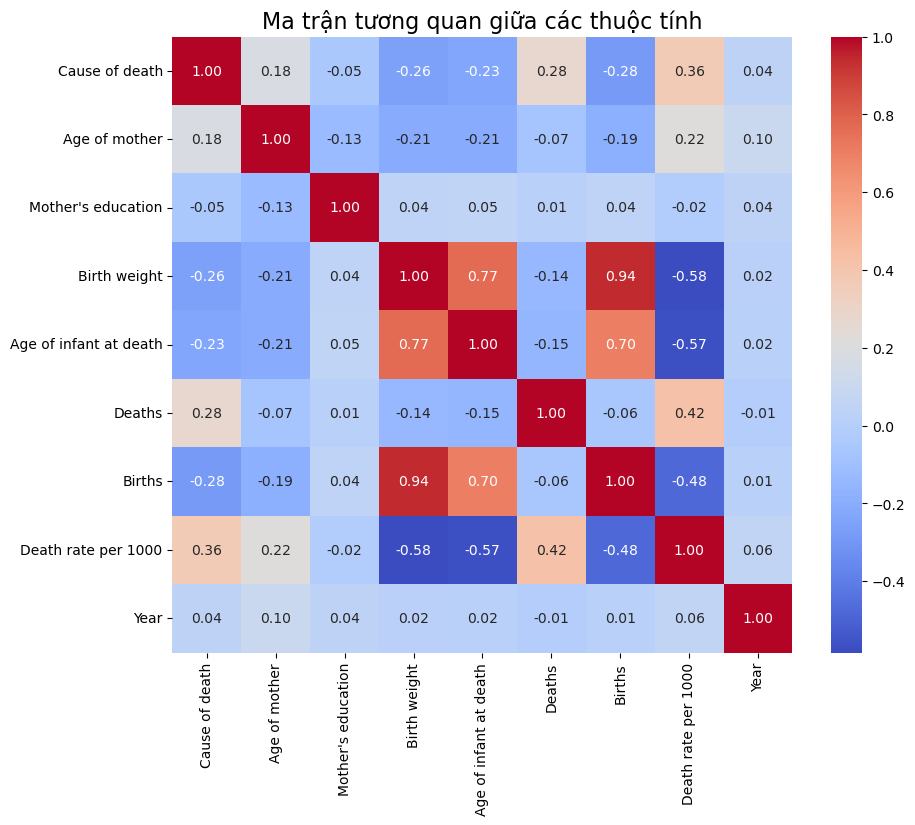

In [760]:
plt.figure(figsize=(10, 8))
correlation_matrix = data_1999_2022_encode.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Ma trận tương quan giữa các thuộc tính', fontsize=16)
plt.show()

- Phân tích sự tương quan giữa các thuộc tính ở trên :
    + Trọng lượng khi sinh (Birth weight) có mối tương quan mạnh với:
        + Tuổi của trẻ sơ sinh khi tử vong (Age of infant at death): Tương quan 0.768. Điều này cho thấy trọng lượng khi sinh có thể ảnh hưởng lớn đến tuổi thọ của trẻ sơ sinh.
        + Số lượng sinh (Births): Tương quan 0.939. Trọng lượng khi sinh có mối liên hệ chặt chẽ với số lượng sinh, có thể do các yếu tố sức khỏe và điều kiện sinh sản.
    + Số lượng sinh (Births) cũng có mối tương quan mạnh với:
        + Tuổi của trẻ sơ sinh khi tử vong (Age of infant at death): Tương quan 0.701. Điều này cho thấy số lượng sinh có thể ảnh hưởng đến tuổi thọ của trẻ sơ sinh.
    + Số lượng tử vong (Deaths) có mối tương quan dương với:
        + Nguyên nhân tử vong (Cause of death): Tương quan 0.276. Điều này cho thấy số lượng tử vong có thể liên quan đến các nguyên nhân tử vong cụ thể.
        + Tỷ lệ tử vong trên 1000 (Death rate per 1000): Tương quan 0.424. Số lượng tử vong có mối liên hệ với tỷ lệ tử vong, cho thấy mức độ nghiêm trọng của các nguyên nhân tử vong.
    + Năm sinh (Year) có mối quan hệ tương quan dương mạnh với: 
        + Nguyên nhân tử vong (Cause of death): Tương quan 0.041. Mặc dù mức độ tương quan không quá cao, nhưng vẫn cho thấy có một mối liên hệ nhất định giữa năm sinh và nguyên nhân tử vong.
        + Tỉ lệ tử vong (Death rate per 1000): Tương quan 0.056. Điều này cho thấy tỉ lệ tử vong có xu hướng thay đổi theo thời gian, có thể do các yếu tố như tiến bộ y tế, thay đổi trong điều kiện sống và các biện pháp phòng ngừa bệnh tật.
- Kết luận: 
    + Trọng lượng khi sinh là một yếu tố quan trọng ảnh hưởng đến sức khỏe và tuổi thọ của trẻ sơ sinh. Các biện pháp cải thiện trọng lượng khi sinh có thể giúp giảm tỷ lệ tử vong và tăng tuổi thọ của trẻ.
    + Số lượng sinh có mối liên hệ với nhiều yếu tố khác nhau, bao gồm tuổi thọ của trẻ sơ sinh và các yếu tố sức khỏe khác. Điều này cho thấy cần có các chính sách và biện pháp hỗ trợ sức khỏe sinh sản để cải thiện chất lượng cuộc sống.

